# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [77]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
# Set the API base URL (EDITED)
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_api_key = "d66275f1092470d1bd9a78c59d5097a1"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city (EDITED)
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data (EDITED)
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date (EDITED)
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | huangshan
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | barma
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | newman
Processing Record 12 of Set 1 | iron river
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | port saint john's
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | madimba
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | afaahiti
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | no

In [79]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-3.66,97,100,5.14,CA,1730159916
1,huangshan,29.7114,118.3125,14.71,86,100,1.25,CN,1730159918
2,wailua homesteads,22.0669,-159.3780,27.44,82,40,9.26,US,1730159919
3,waitangi,-43.9535,-176.5597,12.12,87,49,6.84,NZ,1730159920
4,bredasdorp,-34.5322,20.0403,13.94,96,25,2.74,ZA,1730159922


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/anna_cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/anna_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.66,97,100,5.14,CA,1730159916
1,huangshan,29.7114,118.3125,14.71,86,100,1.25,CN,1730159918
2,wailua homesteads,22.0669,-159.3780,27.44,82,40,9.26,US,1730159919
3,waitangi,-43.9535,-176.5597,12.12,87,49,6.84,NZ,1730159920
4,bredasdorp,-34.5322,20.0403,13.94,96,25,2.74,ZA,1730159922


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

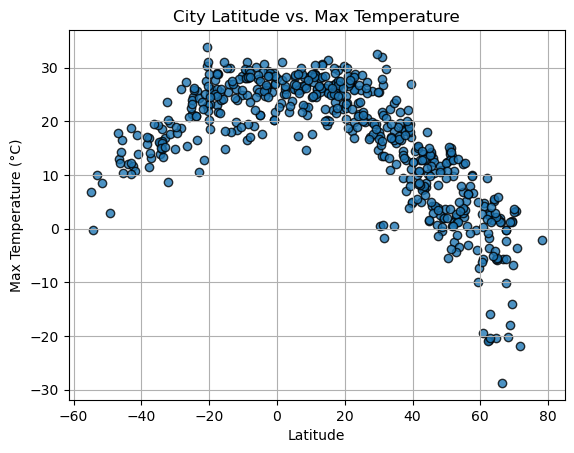

In [83]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/anna_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

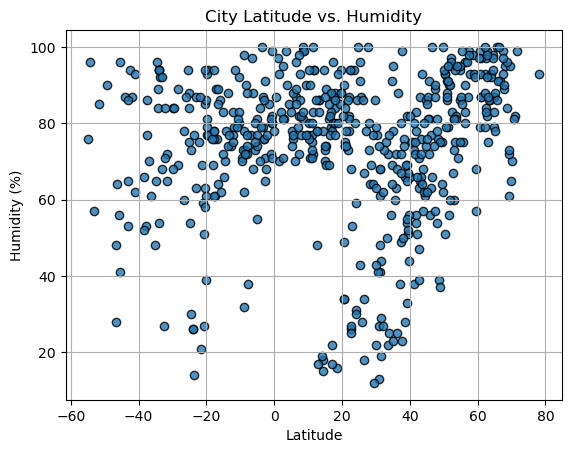

In [84]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/anna_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

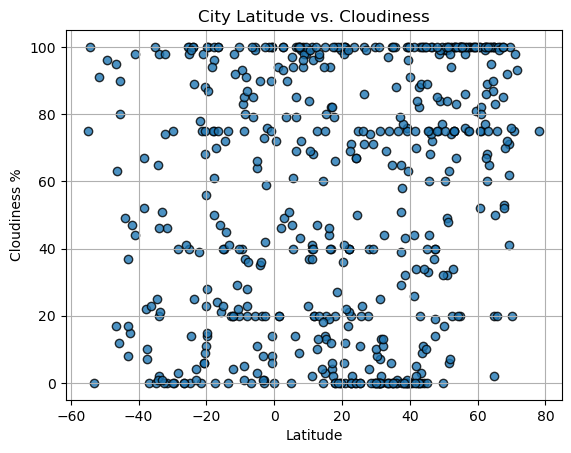

In [85]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid(True)

# Save the figure
plt.savefig("output_data/anna_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

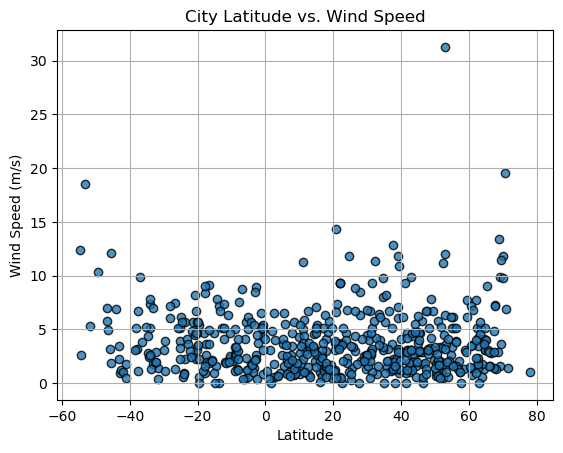

In [86]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/anna_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
# Will define in a later cell :)

In [88]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.66,97,100,5.14,CA,1730159916
1,huangshan,29.7114,118.3125,14.71,86,100,1.25,CN,1730159918
2,wailua homesteads,22.0669,-159.3780,27.44,82,40,9.26,US,1730159919
7,barma,8.3500,-11.3333,22.62,100,99,0.90,SL,1730159926
9,newman,37.3138,-121.0208,18.36,49,39,3.58,US,1730159928


In [89]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,12.12,87,49,6.84,NZ,1730159920
4,bredasdorp,-34.5322,20.0403,13.94,96,25,2.74,ZA,1730159922
5,port-aux-francais,-49.3500,70.2167,3.01,90,96,10.35,TF,1730159923
6,blackmans bay,-43.0167,147.3167,18.74,53,37,0.89,AU,1730159924
8,margaret river,-33.9500,115.0667,18.50,54,2,2.53,AU,1730159927


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7415821126382975


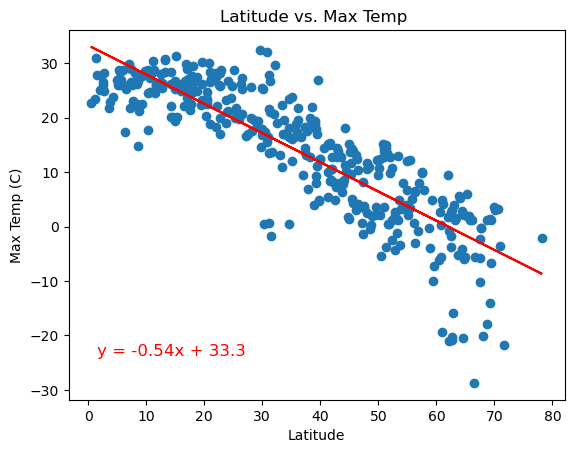

In [90]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min() + 1, y_values.min() + 5),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Max Temp ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()


The r^2-value is: 0.5557072815240837


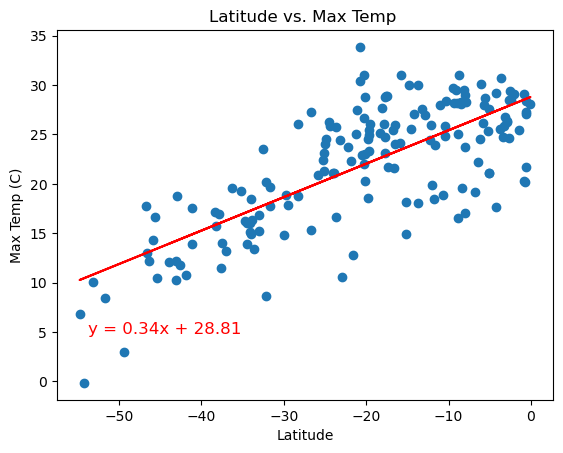

In [91]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min() + 1, y_values.min() + 5),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Max Temp ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
The above scatterplots illustrate the relationship between latitude and the maximum temperature in both the Northern Hemisphere and the Souther Hemisphere to the equator. 
For the Northern Hemisphere, you can see the suggested negative linear relationship between latitude and maximum temperature. As the latitude increases away from the equator, the max temperature decreases. 
For the Southern Hemisphere, you can see the suggested positive linear relationship between latitude and maximum temperature. As the latitude increases toward the equator, the max temperature increases.  
These trend lines indicate that latitude is a meaningful predictor of maximum temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.026112418763852664


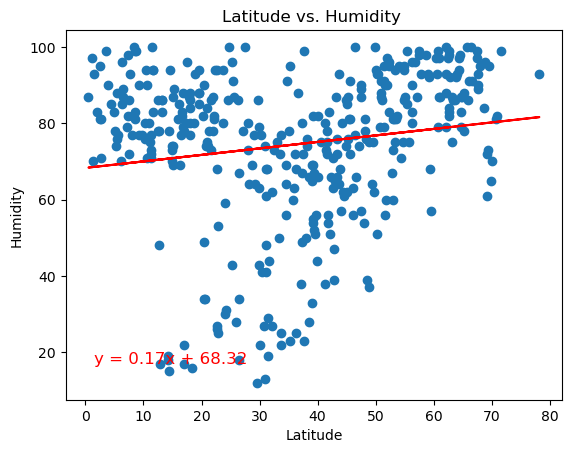

In [92]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min() + 1, y_values.min() + 5),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.01843444207263432


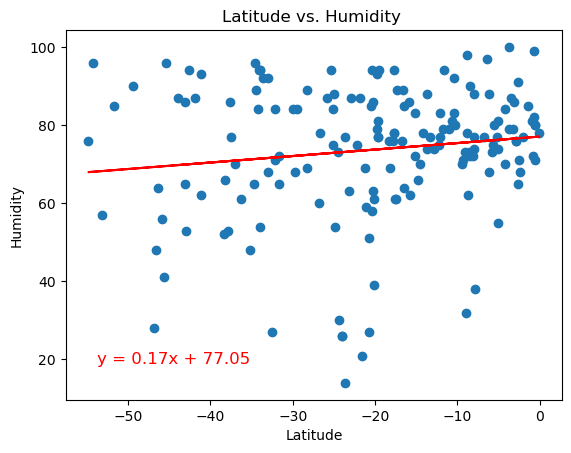

In [93]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min() + 1, y_values.min() + 5),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
The above scatterplots illustrate the relationship between latitude and the humidity in both the Northern Hemisphere and the Souther Hemisphere to the equator. 
These trend lines indicate that latitude is not a meaningful predictor of humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.04501878240059319


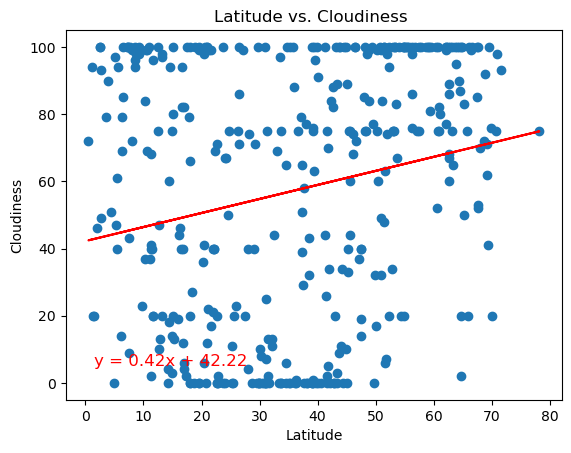

In [94]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min() + 1, y_values.min() + 5),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.0013315579194058378


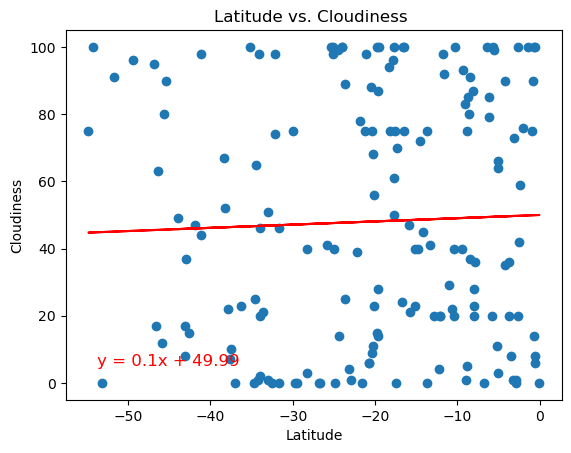

In [95]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min() + 1, y_values.min() + 5),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
The above scatterplots illustrate the relationship between latitude and the cloudiness in both the Northern Hemisphere and the Souther Hemisphere to the equator. 
These trend lines indicate that latitude is not a meaningful predictor of cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.019187063565409695


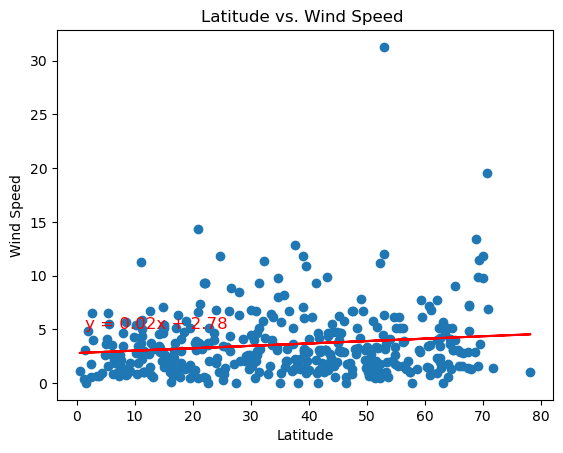

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min() + 1, y_values.min() + 5),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.03926139837218098


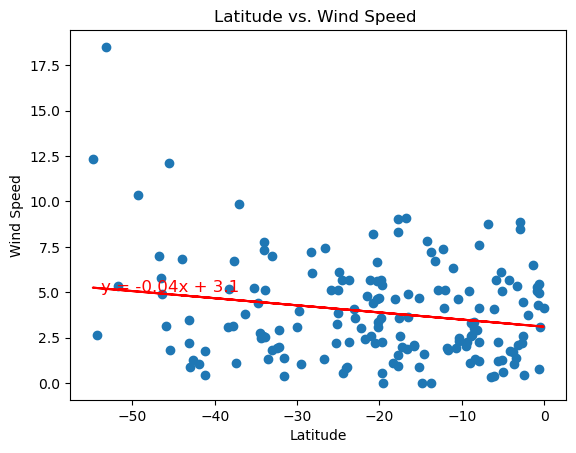

In [97]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min() + 1, y_values.min() + 5),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed ")
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
The above scatterplots illustrate the relationship between latitude and the cloudiness in both the Northern Hemisphere and the Souther Hemisphere to the equator. These trend lines indicate that latitude is not a meaningful predictor of cloudiness.